In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Set plot theme
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [81]:
# Load data
file_path = "../data/processed/customer_master_view.csv"
df = pd.read_csv(file_path)
df["last_transaction_date"] = pd.to_datetime(df["last_transaction_date"], errors="coerce")
df.head(5)

,customer_id,name,gender,age,registration_channel,registration_date,total_transactions,total_spend,avg_transaction_value,last_transaction_date,total_points_earned,total_points_redeemed,current_balance,status
0,1a4a26c3-2207-4396-b175-be712100e243,Kevin Thompson,Male,19,Offline,2022-07-01,10,22390.49,2239.049000,2024-03-19,1853,0,1853,Active
1,68fcf654-16a0-4e63-baef-ac161ba0aad5,Charles Mckee,Male,32,Online,2021-03-23,10,27132.31,2713.231000,2024-01-23,2743,618,2125,Active
2,7231d7ba-0c7e-40a6-9cca-5c3321552882,Kevin Wade,Male,61,Online,2022-01-31,13,33696.06,2592.004615,2023-07-15,1982,517,1465,Inactive
3,527395b0-d07f-4afa-aecd-3876c0939ff9,Ronald Phillips,Female,20,Online,2022-01-15,9,29789.53,3309.947778,2023-04-12,3989,1423,2566,Inactive
4,470d3c0f-4102-4cbd-bb46-69e79832d3dc,Dr. Michelle Reyes,Male,31,Online,2023-12-06,10,28746.57,2874.657000,2024-04-24,2943,650,2293,Active


In [82]:
# Summary Stats

print(f"Total customers: {len(df)}")
print(f"Active customers: {(df["status"] == "Active").sum()}")
print(f"Inactive customers: {(df["status"] == "Inactive").sum()}")
df.describe().T[["mean", "50%", "max"]]

Total customers: 500
Active customers: 371
Inactive customers: 129


,mean,50%,max
age,43.54,43.0,70.0
total_transactions,12.0,12.0,25.0
total_spend,30400.97754,29582.48,66553.2
avg_transaction_value,2529.944668,2536.021429,3941.225556
last_transaction_date,2023-12-24 11:19:40.800000,2024-01-29 00:00:00,2024-04-27 00:00:00
total_points_earned,2559.338,2517.0,5299.0
total_points_redeemed,648.408,618.5,1994.0
current_balance,1910.93,1851.5,4031.0


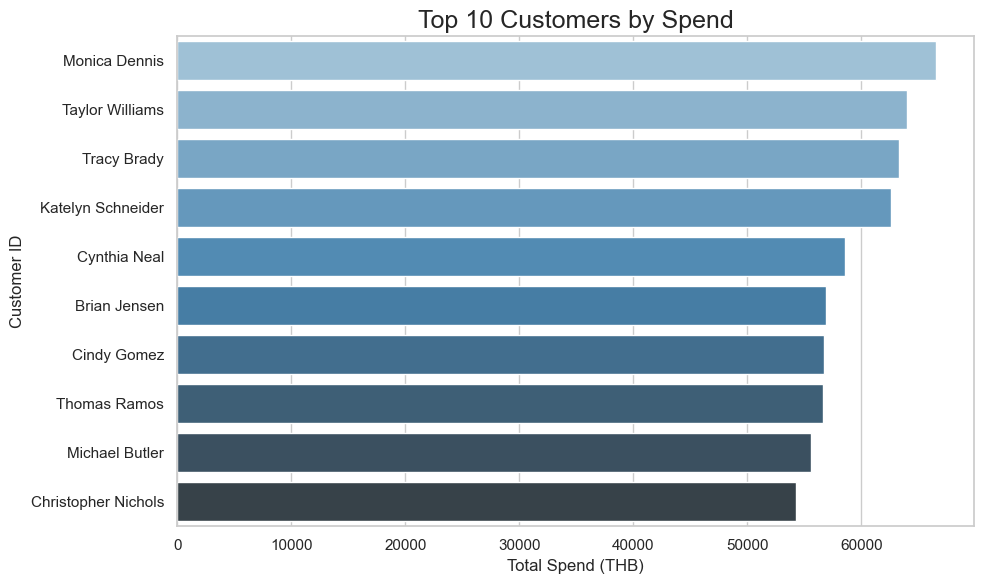

In [83]:
# ---------------- #
# Plot Top Spender #
# ---------------- #

top_spender = df.sort_values("total_spend", ascending=False).head(10)
sns.barplot(data=top_spender, x="total_spend", y="name", palette="Blues_d", hue="customer_id", legend=False)
plt.title("Top 10 Customers by Spend", fontsize=18, loc="center")
plt.xlabel("Total Spend (THB)")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()

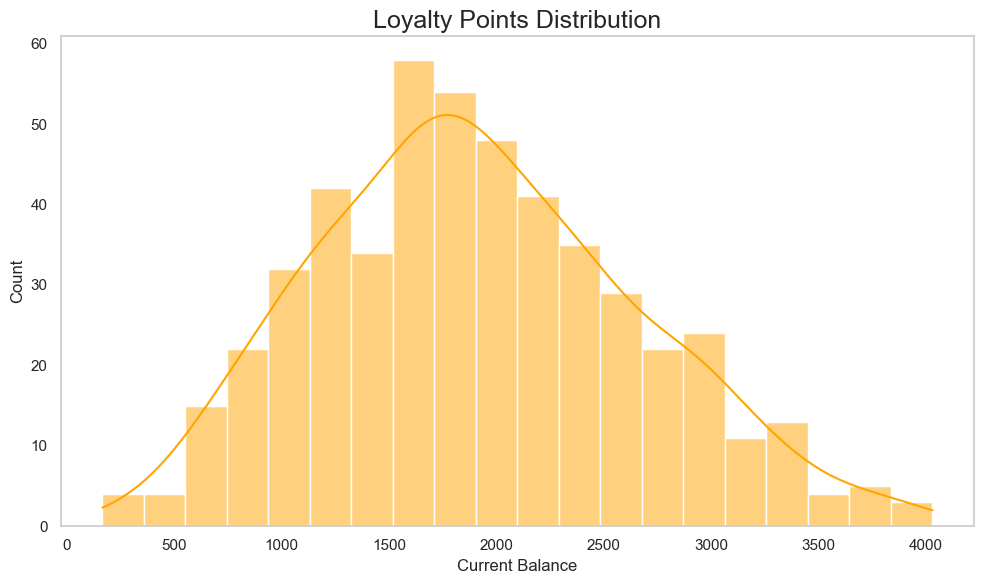

In [84]:
# -------------------------- #
# Loyal Balance Distribution #
# -------------------------- #

# kde : Kernel Density Estimate
sns.histplot(df["current_balance"], bins=20, kde=True, color="orange")
plt.title("Loyalty Points Distribution", fontsize=18)
plt.xlabel("Current Balance")
plt.tight_layout()
plt.grid(False)
plt.show()

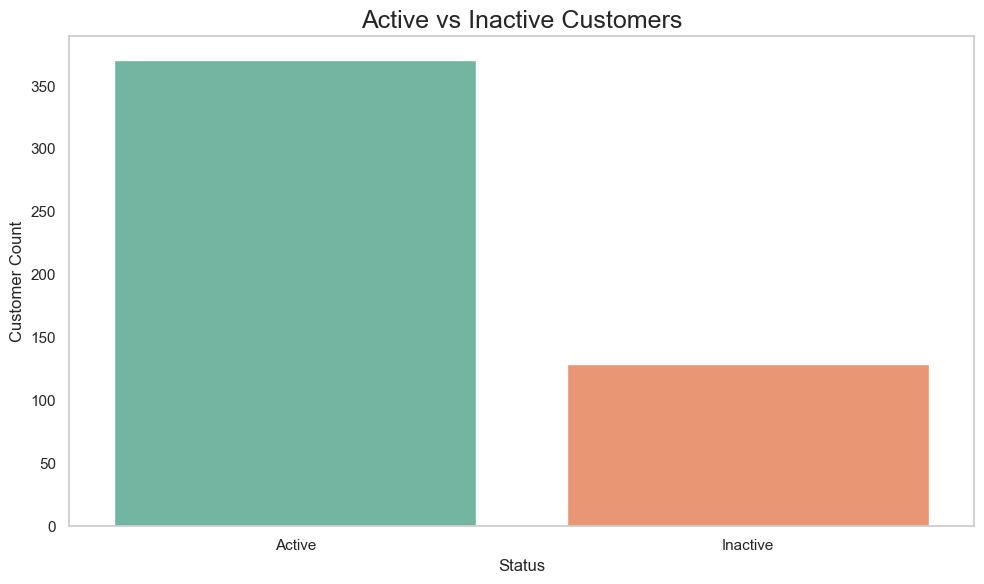

In [85]:
# ------------------- #
# Correlation Heatmap #
# ------------------- #

sns.countplot(data=df, x="status", palette="Set2", hue="status")
plt.title("Active vs Inactive Customers", fontsize=18)
plt.xlabel("Status")
plt.ylabel("Customer Count")
plt.grid(False)
plt.tight_layout()
plt.show()

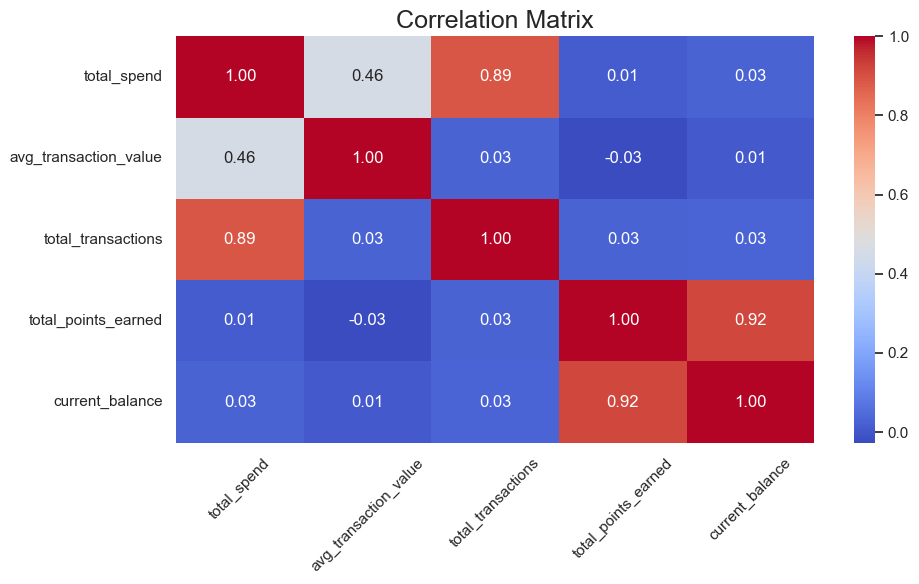

In [86]:
# ------------------- #
# Correlation Heatmap #
# ------------------- #

corr_cols = ["total_spend", "avg_transaction_value", "total_transactions", "total_points_earned", "current_balance"]
corr_matrix = df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks(rotation=45)
plt.title("Correlation Matrix", fontsize=18)
plt.tight_layout()
plt.show()

In [87]:
# Save

df.to_csv("../data/final/dashboard_data.csv", index=False)
print("Final data saved for Power BI dashboard.")

Final data saved for Power BI dashboard.
